<a href="https://colab.research.google.com/github/amanmanjhi/ml-project/blob/main/loan%20approval%20cum%20risk%20classification%20model%20(USING_RANDOM_FOREST_AND_LOGISTIC_REGRESSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_excel("/content/drive/MyDrive/Project data/a_Dataset_CreditScoring.xlsx")

### Data preparation/preprocessing


In [ ]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [ ]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


**DROPING A UNNECCESORY COLUMN**

In [ ]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [ ]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

**HANDLING MISSING VALUES**

In [ ]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [ ]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [ ]:
# count of good loans (0) and bad loans (1)
dataset['TARGET'].value_counts()

TARGET
0    2500
1     500
Name: count, dtype: int64

In [ ]:
# # data summary across 0 & 1
# dataset.groupby('TARGET').mean()

### Train Test Split

In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [ ]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

**normalization of data**


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Exporting Normalisation Coefficients for later use in prediction
# import joblib
# joblib.dump(sc, '/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f2_Normalisation_CreditScoring')

### Risk Model building Using Logistic Regression

In [ ]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**ploting roc curve for logistic regression model**

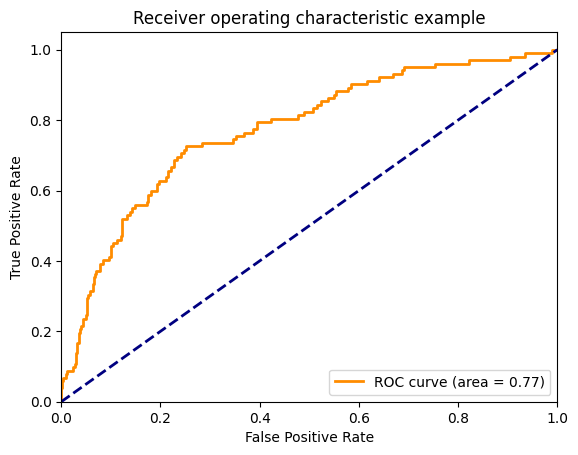

In [ ]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for the logistic regression model
probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Model PERFORMANCE

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[482  16]
 [ 88  14]]


**ACCURACY OF THE MODEL**

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8266666666666667


**RISK MODEL BUILDING USING RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8416666666666667


**Visualizing a Single Decision Tree from the Random Forest Model**

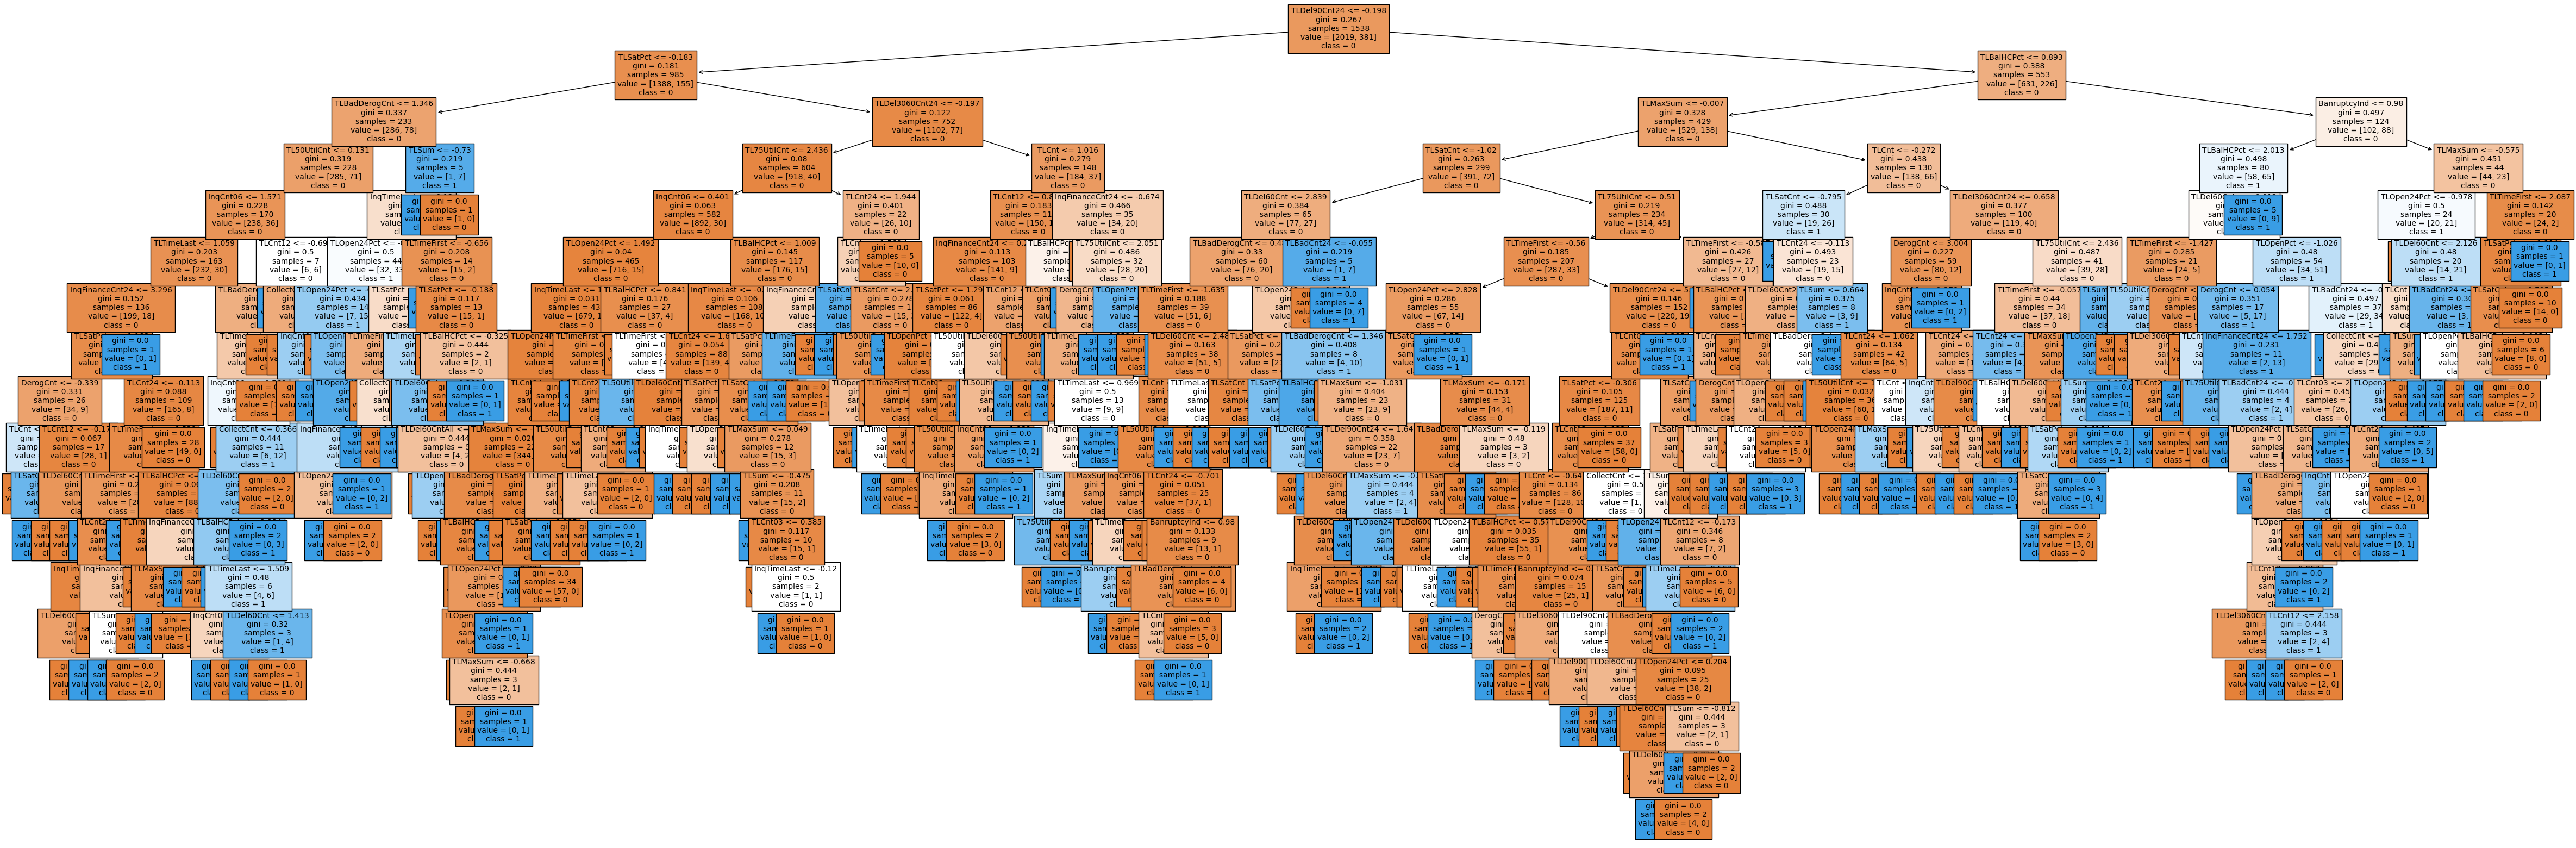

In [ ]:


from sklearn import tree
import matplotlib.pyplot as plt

# Create a new figure with desired size
plt.figure(figsize=(60, 20))

# Extract the first tree from the forest
tree_0 = rfc.estimators_[0]

# Render the tree graphically
tree.plot_tree(tree_0, feature_names=dataset.columns[1:29], class_names=['0', '1'], fontsize=10, filled=True)

# Display the tree
plt.show()


In [ ]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
# joblib.dump(rfc, '/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f1_Classifier_CreditScoring')

In [ ]:
predictions = rfc.predict_proba(X_test)
predictions

array([[0.26, 0.74],
       [0.88, 0.12],
       [0.61, 0.39],
       ...,
       [0.78, 0.22],
       [0.56, 0.44],
       [0.96, 0.04]])

**WRINTING MODEL OUTPUT IN CSV FILE**

In [ ]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/drive/My Drive/Project data/aman_Model_Prediction.csv", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.26,0.74,1
1,0,0.88,0.12,0
2,0,0.61,0.39,0
3,0,0.78,0.22,0
4,0,0.91,0.09,0


**HERE OUR CODING PART ENDS:**


### Writing output file

In [ ]:
# # writing model output file

# df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
# df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
# df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

# dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

# dfx.to_csv("/content/drive/MyDrive/minor project/project outcome.csv", sep=',', encoding='UTF-8')

# dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.040435,0.959565,1
1,0,0.937798,0.062202,0
2,0,0.711622,0.288378,0
3,0,0.906753,0.093247,0
4,0,0.877058,0.122942,0


### Coding ends here!